# **LIMPIEZA DE DATOS**

In [299]:
%matplotlib notebook
%matplotlib inline

CARGA DE LIBRERIAS

In [300]:
import pandas as pd
import numpy as np
import os
import missingno as msno 
import matplotlib.pyplot as plt
import seaborn as sns

CARGA DE FICHEROS

In [301]:
CARPETA_DATOS_ORIGINALES = 'datos/Originales/'
df_sabi_1= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_modif_1.xlsx'))
df_sabi_2= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_modif_2_new.xlsx'))
df_sabi_parte3= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_sabi_parte3.xlsx'))
df_dealroom= pd.read_excel(os.path.join(CARPETA_DATOS_ORIGINALES, 'df_dealroom_modif.xlsx'))

c:\Users\ikerm\.conda\envs\reto06\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


VISUALIZAMOS LOS FICHEROS

In [302]:
df_sabi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Codigo_NIF                  412 non-null    object 
 1   Nombre_sabi                 412 non-null    object 
 2   Localidad                   412 non-null    object 
 3   Fecha constitucion          412 non-null    object 
 4   Codigo consolidacion        412 non-null    object 
 5   Codigo primario CNAE 2009   412 non-null    int64  
 6   Forma juridica              412 non-null    object 
 7   Forma juridica detallada    412 non-null    object 
 8   Estado                      412 non-null    object 
 9   Estado detallado            412 non-null    object 
 10  Capital social mil EUR      412 non-null    float64
 11  Free capital mil EUR        412 non-null    float64
 12  Porcentaje_adquisicion_cat  412 non-null    int64  
dtypes: float64(2), int64(2), object(9)


In [303]:
df_sabi_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Codigo_NIF                                                  824 non-null    object 
 1   year                                                        824 non-null    int64  
 2   Acreedores a L. P. mil EUR                                  612 non-null    float64
 3   Acreedores comerciales mil EUR                              565 non-null    float64
 4   Activo circulante mil EUR                                   815 non-null    float64
 5   Apalancamiento (%) %                                        816 non-null    float64
 6   Capital suscrito mil EUR                                    816 non-null    float64
 7   Cash flow mil EUR                                           816 non-null    float64
 8   

In [304]:
df_dealroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Codigo_NIF            412 non-null    object 
 1   name_dealroom         412 non-null    object 
 2   profile_url           412 non-null    object 
 3   website               412 non-null    object 
 4   tagline               356 non-null    object 
 5   total_funding         381 non-null    float64
 6   first_funding_date    364 non-null    object 
 7   last_funding_date     364 non-null    object 
 8   last_funding          196 non-null    float64
 9   last_round            342 non-null    object 
 10  total_rounds          412 non-null    int64  
 11  n_empleados_dealroom  107 non-null    float64
 12  ownerships            345 non-null    object 
 13  b2b_b2c               397 non-null    object 
 14  revenue_models        228 non-null    object 
 15  growth_stage          4

In [305]:
print(df_sabi_1.isna().sum())
print(df_sabi_1.shape)

Codigo_NIF                    0
Nombre_sabi                   0
Localidad                     0
Fecha constitucion            0
Codigo consolidacion          0
Codigo primario CNAE 2009     0
Forma juridica                0
Forma juridica detallada      0
Estado                        0
Estado detallado              0
Capital social mil EUR        0
Free capital mil EUR          0
Porcentaje_adquisicion_cat    0
dtype: int64
(412, 13)


In [306]:
df_sabi_2.columns

Index(['Codigo_NIF', 'year', 'Acreedores a L. P. mil EUR',
       'Acreedores comerciales mil EUR', 'Activo circulante mil EUR',
       'Apalancamiento (%) %', 'Capital suscrito mil EUR', 'Cash flow mil EUR',
       'Deudas financieras mil EUR', 'EBITDA mil EUR', 'Endeudamiento (%) %',
       'Existencias mil EUR', 'Fondo de maniobra mil EUR',
       'Fondos propios mil EUR', 'Gastos financieros mil EUR',
       'Importe neto Cifra de Ventas mil EUR',
       'Ingresos de explotación mil EUR', 'Inmovilizado inmaterial mil EUR',
       'Inmovilizado material mil EUR', 'Inmovilizado mil EUR',
       'Margen de beneficio (%) %', 'Número empleados',
       'Otros fondos propios mil EUR', 'Pasivo fijo mil EUR',
       'Pasivo líquido mil EUR', 'Período de cobro (días) días',
       'Ratio de liquidez %', 'Ratio de solvencia %',
       'Rentabilidad económica (%) %', 'Rentabilidad financiera (%) %',
       'Result. ordinarios antes Impuestos mil EUR',
       'Resultado Actividades Ordinarias 

Codigo_NIF                                                      0
year                                                            0
Acreedores a L. P. mil EUR                                    212
Acreedores comerciales mil EUR                                259
Activo circulante mil EUR                                       9
Apalancamiento (%) %                                            8
Capital suscrito mil EUR                                        8
Cash flow mil EUR                                               8
Deudas financieras mil EUR                                    400
EBITDA mil EUR                                                  9
Endeudamiento (%) %                                             8
Existencias mil EUR                                           434
Fondo de maniobra mil EUR                                      11
Fondos propios mil EUR                                          8
Gastos financieros mil EUR                                      8
Importe ne

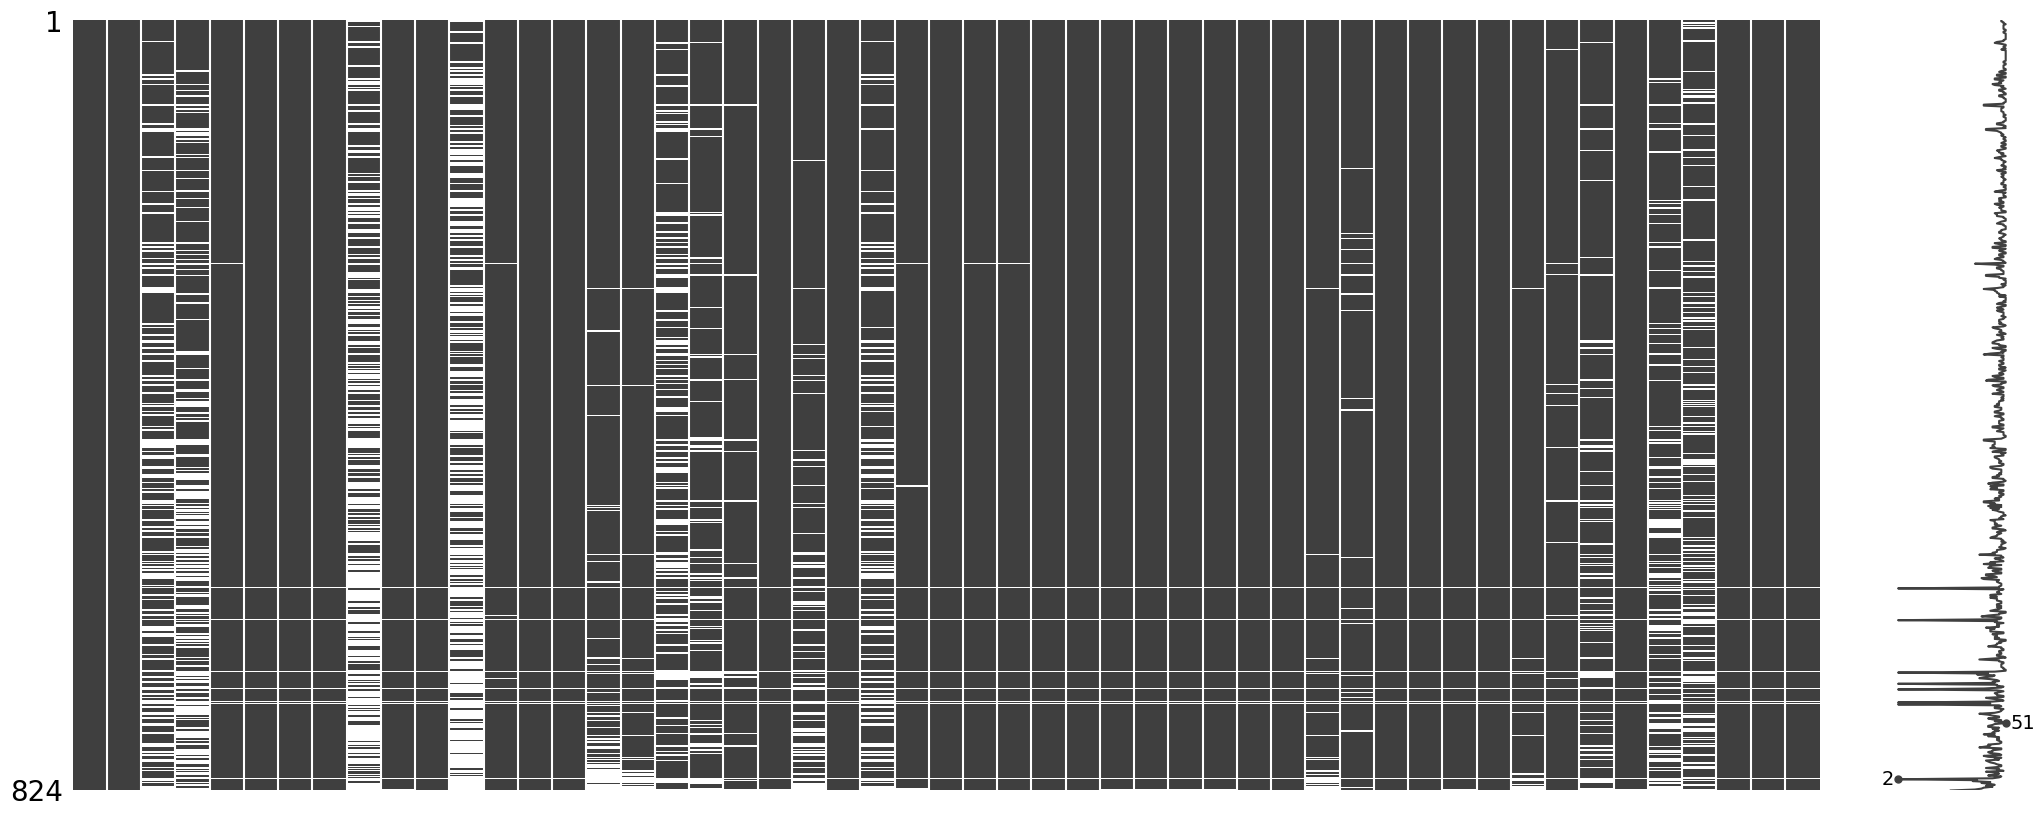

In [307]:
print(df_sabi_2.isna().sum())
print(msno.matrix(df_sabi_2))

CONVERSION DE VALORES Y CREACION DE VARIABLES

In [308]:
# pasamos el n.s. a NaN con applymap
df_sabi_2=df_sabi_2.applymap(lambda x: np.nan if x=='n.s.' else x)

In [309]:
print(df_sabi_2.shape)
# calculamos la cantidad de nulos por fila
# print(df_sabi_2.isna().sum(axis=1)[df_sabi_2.isna().sum(axis=1)>8])
indices_missings= df_sabi_2.isna().sum(axis=1)[df_sabi_2.isna().sum(axis=1)>8].index
print(df_sabi_2.iloc[indices_missings,:])

(824, 51)
    Codigo_NIF  year  Acreedores a L. P. mil EUR  \
90   B75219261  2021                         NaN   
91   B75219261  2020                         NaN   
116  B01518620  2021                         NaN   
117  B01518620  2020                         NaN   
260  B75157081  2021                         NaN   
..         ...   ...                         ...   
818  B01563881  2021                    30.64454   
820  B95626842  2021                         NaN   
821  B95626842  2020                         NaN   
822  B95992509  2021                         NaN   
823  B95992509  2020                         NaN   

     Acreedores comerciales mil EUR  Activo circulante mil EUR  \
90                              NaN                 1532.43809   
91                              NaN                  505.32821   
116                             NaN                 1074.15346   
117                             NaN                 1025.11823   
260                             NaN

In [310]:
# creamos columna con numero de missing por fila
df_sabi_2['n_missings']= df_sabi_2.isna().sum(axis=1)

In [311]:
# sacamos el codigo_nif de las empresas que tienen mas de 20 missings
empresas_missings= df_sabi_2[df_sabi_2['n_missings']>20]['Codigo_NIF'].unique()
empresas_missings

array(['B05496914', 'B02808889', 'B42938407', 'B02943348', 'B02952505',
       'B02752228', 'B02793743', 'B02731099', 'B95992509'], dtype=object)

In [312]:
# eliminamos las empresas con mas de 20 missings
df_sabi_2= df_sabi_2[~df_sabi_2['Codigo_NIF'].isin(empresas_missings)]
print(df_sabi_2.shape)
# lo mismo con df_sabi_1
df_sabi_1= df_sabi_1[~df_sabi_1['Codigo_NIF'].isin(empresas_missings)]
print(df_sabi_1.shape)
# tambien con df_dealroom
df_dealroom= df_dealroom[~df_dealroom['Codigo_NIF'].isin(empresas_missings)]
print(df_dealroom.shape)

(806, 52)
(403, 13)
(403, 18)


VISUALIZACION DE VALORES AUSENTES

In [313]:
print(df_dealroom.isna().sum())

Codigo_NIF                0
name_dealroom             0
profile_url               0
website                   0
tagline                  56
total_funding            31
first_funding_date       47
last_funding_date        47
last_funding            211
last_round               69
total_rounds              0
n_empleados_dealroom    297
ownerships               67
b2b_b2c                  15
revenue_models          180
growth_stage              1
company_status            0
valuation_2022          343
dtype: int64


In [314]:
df_dealroom.describe()

,total_funding,last_funding,total_rounds,n_empleados_dealroom,valuation_2022
count,372.000000,192.000000,403.000000,106.000000,60.000000
mean,0.875685,0.915474,3.724566,29.990566,14.866000
std,6.173921,7.534666,3.070655,44.610803,31.307508
min,0.000000,0.001000,0.000000,1.000000,0.090000
25%,0.030000,0.010000,2.000000,7.000000,1.267500
50%,0.050000,0.030000,3.000000,18.000000,4.460000
75%,0.150000,0.090000,5.000000,37.750000,10.855000
max,100.000000,100.000000,24.000000,347.000000,156.400000


In [315]:
df_dealroom.describe(include='object')

,Codigo_NIF,name_dealroom,profile_url,website,tagline,first_funding_date,last_funding_date,last_round,ownerships,b2b_b2c,revenue_models,growth_stage,company_status
count,403,403,403,403,347,356,356,334,336,388,223,402,403
unique,403,403,403,403,347,73,85,11,19,3,7,3,3
top,A78053147,Hostalia,https://app.dealroom.co/companies/hostalia,http://hostalia.com,Integral Solutions for Custom Electromobility ...,jan/2017,jan/2021,GRANT,accelerator,business,saas,seed,operational
freq,1,1,1,1,1,42,61,151,251,308,110,254,392


<AxesSubplot: >

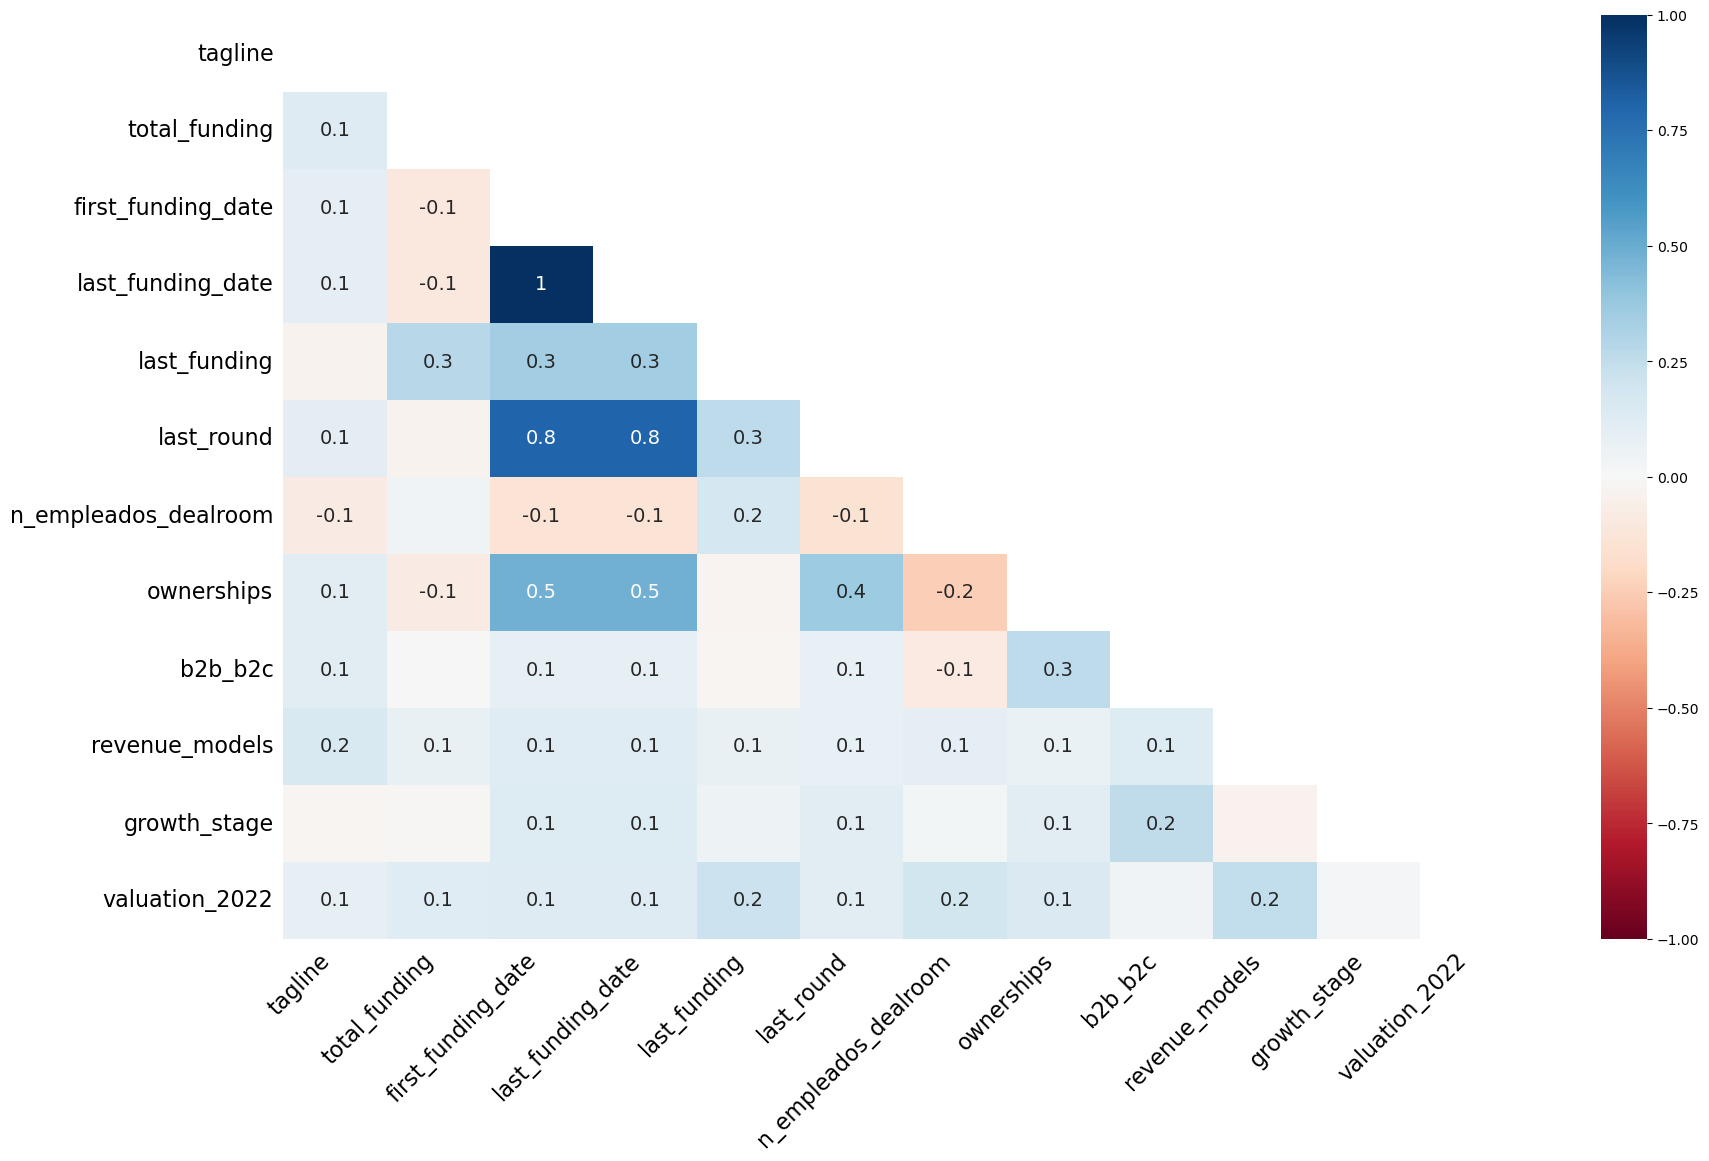

In [316]:
# correlograma de missing values
msno.heatmap(df_dealroom)

In [317]:
df_dealroom['last_round'].value_counts()

GRANT              151
SUPPORT PROGRAM    130
SEED                32
LATE VC              6
EARLY VC             4
ACQUISITION          4
SERIES A             3
IPO                  1
SERIES C             1
SPINOUT              1
CONVERTIBLE          1
Name: last_round, dtype: int64

In [318]:
df_dealroom[df_dealroom['n_empleados_dealroom'].isna()]

,Codigo_NIF,name_dealroom,profile_url,website,tagline,total_funding,first_funding_date,last_funding_date,last_funding,last_round,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022
0,A78053147,Hostalia,https://app.dealroom.co/companies/hostalia,http://hostalia.com,NaN,0.00,NaN,NaN,NaN,NaN,0,NaN,bootstrapped,business,saas,early growth,operational,NaN
8,B01517721,Naivan,https://app.dealroom.co/companies/naivan,http://naivan.com,Laser Cut Folded and CNC Formed,0.00,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,manufacturing,early growth,operational,NaN
10,B75228635,Blue Agro,https://app.dealroom.co/companies/blue_agro,http://blueagro.com,"Conventional fertilizers (nitrogen, NPK, amend...",NaN,sep/2019,sep/2019,NaN,SUPPORT PROGRAM,1,NaN,accelerator,business,NaN,seed,operational,NaN
12,B95745832,Bas Projects,https://app.dealroom.co/companies/bas_projects,http://bascorporation.com,Renewable energy and environment,NaN,dec/2013,dec/2013,NaN,SUPPORT PROGRAM,1,NaN,accelerator,business,NaN,early growth,operational,NaN
13,B95731071,Glefaran,https://app.dealroom.co/companies/glefaran,http://glefaran.com,Combustion of forest biomass for energy produc...,0.73,oct/2013,jan/2016,0.02,GRANT,4,NaN,accelerator,business,NaN,seed,operational,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,B75215228,Bimertek,https://app.dealroom.co/companies/bimertek,http://bimertek.com,A technological startup that resolves complex ...,0.03,jan/2019,dec/2019,NaN,SUPPORT PROGRAM,3,NaN,accelerator,business,saas,seed,operational,NaN
404,B75172163,Biotech Foods,https://app.dealroom.co/companies/biotech_foods,http://www.biotech-foods.com,Developing technology to produce Ethicameat: F...,10.44,jan/2017,nov/2021,NaN,ACQUISITION,8,NaN,Subsidiary;Venture Capital;accelerator,business;consumer,manufacturing,early growth,acquired,11.41
406,B95879177,Rotarm Solar Solutions,https://app.dealroom.co/companies/rotarm_solar...,http://rotarm.com,Equipment for installations related to energy ...,0.07,jan/2017,jun/2017,NaN,SUPPORT PROGRAM,3,NaN,accelerator,business,saas,seed,operational,NaN
407,B95957643,Safybox,https://app.dealroom.co/companies/safybox,http://delibertyprimemailbox.com,Offers technological and innovative solutions ...,0.02,jan/2021,jan/2021,NaN,SUPPORT PROGRAM,2,NaN,accelerator,business,saas,seed,operational,NaN


CONVERSION DE VARIABLES

In [319]:
# Convertimos la primera letra de cada palabra a mayuscula
df_dealroom['last_funding_date']= df_dealroom['last_funding_date'].str.capitalize()
df_dealroom['first_funding_date']= df_dealroom['first_funding_date'].str.capitalize()
# hay un valor de fecha que aparece solo el año, lo pasamos a formato mes/año
indice = df_dealroom[df_dealroom['last_funding_date']=='2021'].index[0]
df_dealroom.at[indice, 'last_funding_date'] = 'Jan/2021'
indice = df_dealroom[df_dealroom['first_funding_date']=='2003'].index[0]
df_dealroom.at[indice, 'first_funding_date'] = 'Jan/2003'
indice = df_dealroom[df_dealroom['first_funding_date']=='2017'].index[0]
df_dealroom.at[indice, 'first_funding_date'] = 'Jan/2017'
# pasamos las fechas a datetime
df_dealroom['last_funding_date']= pd.to_datetime(df_dealroom['last_funding_date'], format='%b/%Y')
df_dealroom['first_funding_date']= pd.to_datetime(df_dealroom['first_funding_date'], format='%b/%Y')


In [320]:
print(df_dealroom['b2b_b2c'].value_counts())
print(df_dealroom['b2b_b2c'].isna().sum())

business             308
consumer              66
business;consumer     14
Name: b2b_b2c, dtype: int64
15


In [321]:
# cogemos las empresas que el campo b2b_b2c es NaN
empresas_b2b_b2c_nan= df_dealroom[df_dealroom['b2b_b2c'].isna()]
empresas_b2b_b2c_nan

,Codigo_NIF,name_dealroom,profile_url,website,tagline,total_funding,first_funding_date,last_funding_date,last_funding,last_round,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022
8,B01517721,Naivan,https://app.dealroom.co/companies/naivan,http://naivan.com,Laser Cut Folded and CNC Formed,0.000,NaT,NaT,NaN,NaN,0,NaN,NaN,NaN,manufacturing,early growth,operational,NaN
24,B20933560,Feelfree Rentals,https://app.dealroom.co/companies/feelfree_ren...,http://www.feelfreerentals.com,Alquiler online de apartamentos turísticos par...,0.000,NaT,NaT,NaN,NaN,0,32.0,NaN,NaN,NaN,early growth,operational,NaN
38,A95291613,VIRTUALWARE,https://app.dealroom.co/companies/virtualware_...,https://www.virtualwareco.com/,NaN,0.560,2009-01-01,2021-01-01,0.020,GRANT,24,52.0,NaN,NaN,NaN,late growth,operational,NaN
90,B75018168,DNA Data,https://app.dealroom.co/companies/dna_data,http://dnadata.es,"We conduct Covid-19 tests, book your appointme...",0.020,2012-01-01,2012-01-01,0.020,GRANT,2,NaN,NaN,NaN,manufacturing,seed,operational,NaN
98,B95336517,Gistek Insurance Solutions,https://app.dealroom.co/companies/gistek_insur...,http://www.gistek-s.com,NaN,0.490,2018-01-01,2021-01-01,0.010,GRANT,4,15.0,Venture Capital,NaN,NaN,early growth,operational,NaN
112,B95285292,lorke systems,https://app.dealroom.co/companies/lorke_systems,http://lorke.es,Lorke Systems manufactures and markets Self-cl...,0.000,NaT,NaT,NaN,NaN,0,NaN,NaN,NaN,manufacturing,NaN,operational,NaN
115,B75140434,Modfie,https://app.dealroom.co/companies/modfie,http://modfie.com,Modfie. Your face. Your smile.,0.100,2015-11-01,2019-06-01,NaN,SERIES A,3,NaN,Venture Capital;accelerator,NaN,NaN,early growth,low-activity,0.28
119,B95694956,Innovative Hall Media Technologies,https://app.dealroom.co/companies/innovative_h...,http://www.innovativehall.com,NaN,0.010,2012-01-01,2012-01-01,0.010,GRANT,1,NaN,NaN,NaN,NaN,seed,operational,NaN
152,B01505254,Solid Machine Vision,https://app.dealroom.co/companies/solid_machin...,https://solidmachinevision.com/en/,Machine Vision Solutions - Industry 4.0 - Seek...,0.000,NaT,NaT,NaN,NaN,0,7.0,NaN,NaN,NaN,seed,operational,NaN
158,B48457402,Anbiolab,https://app.dealroom.co/companies/anbiolab,https://www.anbiolab.com/,NaN,0.030,2018-10-01,2019-01-01,0.030,GRANT,2,NaN,accelerator,NaN,NaN,seed,operational,NaN


In [322]:
# buscamos si es b2b o b2c a mano y creamos una funcion para automatizarlo
lista_empresa_consumer= ['Feelfree Rentals', 'Modfie', 'Worldpats', 'Kimet Sport', 'Puntodis', 'DNA Data' ]
lista_empresa_bussines= ['Hub Gasteiz', 'Quevedos Strategic Partners', 'Anbiolab', 'Solid Machine Vision', 'Innovative Hall Media Technologies', 'lorke systems',
'Gistek Insurance Solutions', 'VIRTUALWARE', 'Naivan', ]
for empresa in lista_empresa_consumer:
    df_dealroom.iloc[df_dealroom[df_dealroom['name_dealroom'] == empresa].index[0],13]= 'consumer'
for empresa in lista_empresa_bussines:
    df_dealroom.iloc[df_dealroom[df_dealroom['name_dealroom'] == empresa].index[0],13]= 'business'


In [323]:
# pasamos b2b a 1 en una columna, b2c a 1 en otra, y dejamos los que son ambos a 0
df_dealroom['b2b']= df_dealroom['b2b_b2c'].apply(lambda x: 1 if x=='business' else 0)
df_dealroom['b2c']= df_dealroom['b2b_b2c'].apply(lambda x: 1 if x=='consumer' else 0)

UNIÓN DE LOS DATAFRAMES EN UNO ÚNICO

In [324]:
# juntamos los dos df_sabi
df_sabi= pd.merge(df_sabi_1, df_sabi_2, on='Codigo_NIF', how='inner')
# juntamos este df con el de dealroom
df= pd.merge(df_sabi, df_dealroom, on='Codigo_NIF', how='inner')
df

,Codigo_NIF,Nombre_sabi,Localidad,Fecha constitucion,Codigo consolidacion,Codigo primario CNAE 2009,Forma juridica,Forma juridica detallada,Estado,Estado detallado,...,total_rounds,n_empleados_dealroom,ownerships,b2b_b2c,revenue_models,growth_stage,company_status,valuation_2022,b2b,b2c
0,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985/06/05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,...,0,NaN,bootstrapped,business,saas,early growth,operational,NaN,1,0
1,A78053147,TELEFONICA SOLUCIONES DE INFORMATICA Y COMUNIC...,MADRID,1985/06/05,U2,6190,Sociedad anonima,Sociedad anónima unipersonal,Activa,Activa,...,0,NaN,bootstrapped,business,saas,early growth,operational,NaN,1,0
2,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014/01/21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,...,1,115.0,accelerator,business,NaN,late growth,operational,NaN,1,0
3,B75103515,IRIZAR E-MOBILITY SL.,ADUNA,2014/01/21,U1,2910,Sociedad limitada,Sociedad limitada,Activa,Activa,...,1,115.0,accelerator,business,NaN,late growth,operational,NaN,1,0
4,B95864310,HAIZEA BILBAO SOCIEDAD LIMITADA.,ZIERBENA,2016/11/25,U1,2420,Sociedad limitada,Sociedad limitada,Activa,Activa,...,0,135.0,NaN,business,NaN,late growth,operational,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,B99554537,SENSTILE SOCIEDAD LIMITADA.,BILBAO,2019/08/01,U1,6201,Sociedad limitada,Sociedad limitada,Activa,Activa,...,5,1.0,accelerator,business,NaN,seed,operational,NaN,1,0
802,B01563881,"STRUCTURAL DEFORMITY INDEX SYSTEM, SOCIEDAD LI...",VITORIA-GASTEIZ,2018/01/09,U1,6202,Sociedad limitada,Sociedad limitada,Activa,Activa,...,4,NaN,accelerator,business,NaN,seed,operational,NaN,1,0
803,B01563881,"STRUCTURAL DEFORMITY INDEX SYSTEM, SOCIEDAD LI...",VITORIA-GASTEIZ,2018/01/09,U1,6202,Sociedad limitada,Sociedad limitada,Activa,Activa,...,4,NaN,accelerator,business,NaN,seed,operational,NaN,1,0
804,B95626842,SYMPLIO LIFESTYLE TECHNOLOGIES SOCIEDAD LIMITADA,BILBAO,2010/10/28,U1,6209,Sociedad limitada,Sociedad limitada,Activa,Reapertura de hoja registral: El Registro Merc...,...,0,3.0,not known;bootstrapped,business,NaN,seed,operational,NaN,1,0


AxesSubplot(0.125,0.11;0.698618x0.77)


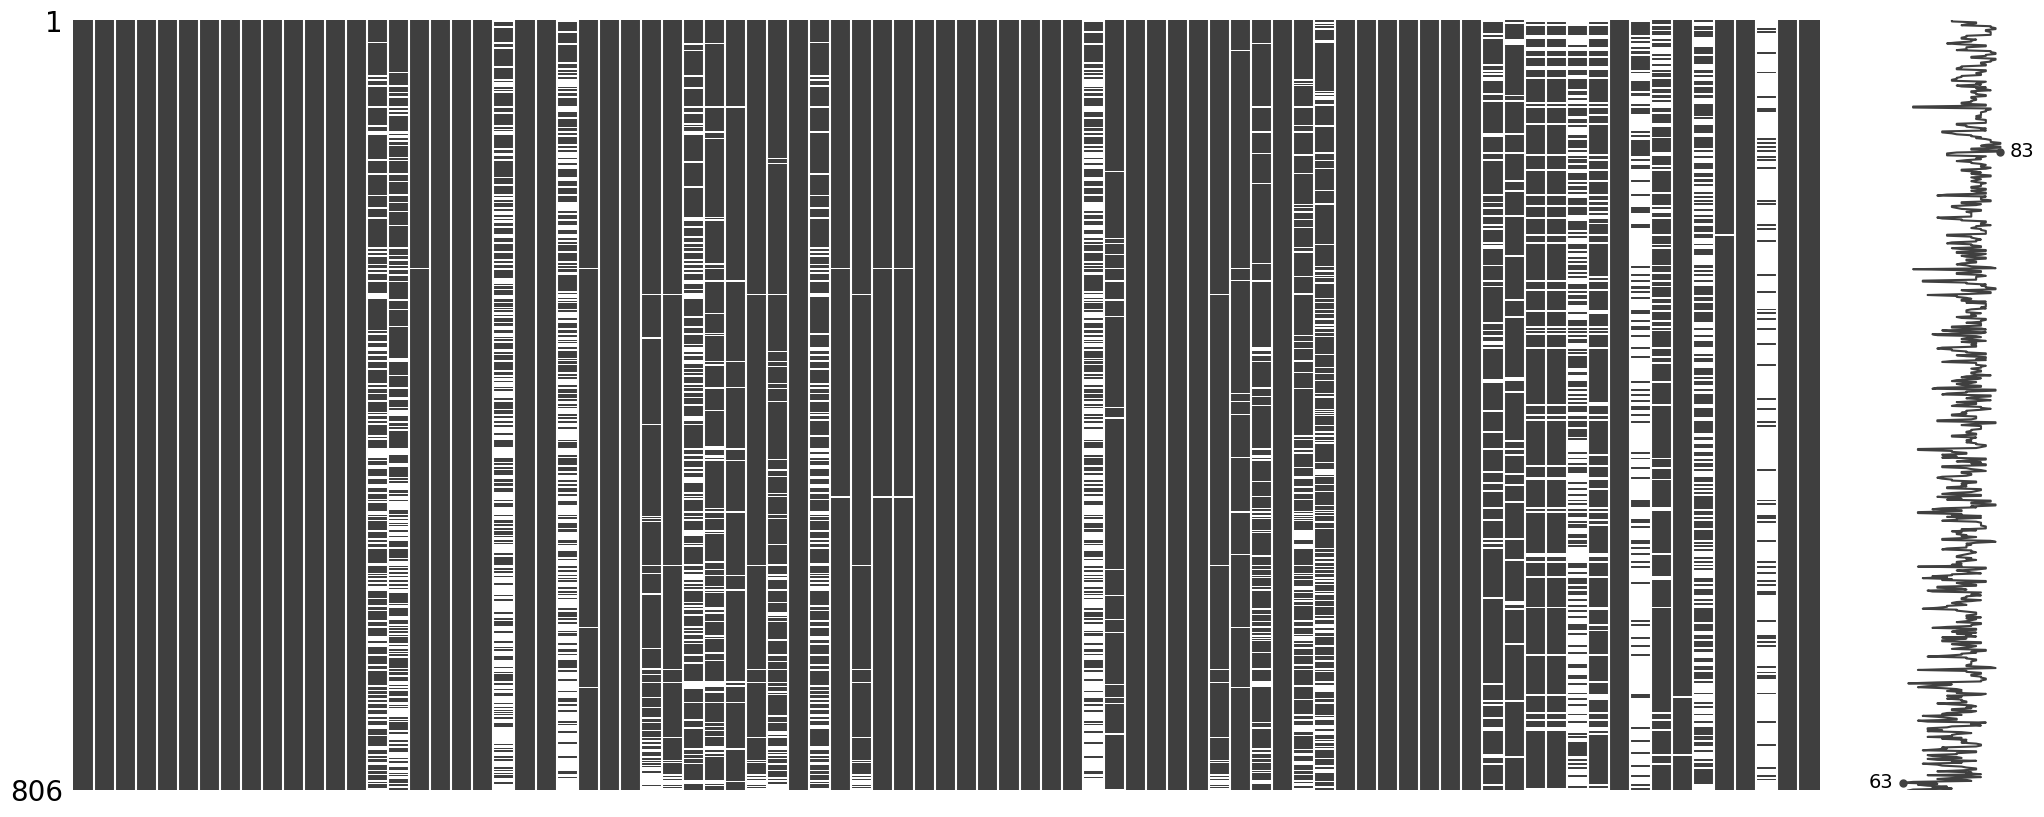

In [325]:
print(msno.matrix(df))

In [326]:
# Vemos de las columnas en las que hay missings en la columna de empleados normal, cuantos missings hay en la de dealroom
print(df['Número empleados'].isna().sum())
print(df[df['Número empleados'].isna()]['n_empleados_dealroom'].isna().sum())
# hay 10 valores que no hay en la columna de sabi, pero si en la de dealroom, por lo que los pasamos
df['Número empleados']= df['Número empleados'].fillna(df['n_empleados_dealroom'])
# Ahora solo quedan 70 valores nulos en la columna de empleados, que son los que no tienen en ninguno de las dos df

80
70


In [327]:
# quitamos la columna de n_empleados_dealroom
df= df.drop('n_empleados_dealroom', axis=1)

In [328]:
df.columns

Index(['Codigo_NIF', 'Nombre_sabi', 'Localidad', 'Fecha constitucion',
       'Codigo consolidacion', 'Codigo primario CNAE 2009', 'Forma juridica',
       'Forma juridica detallada', 'Estado', 'Estado detallado',
       'Capital social mil EUR', 'Free capital mil EUR',
       'Porcentaje_adquisicion_cat', 'year', 'Acreedores a L. P. mil EUR',
       'Acreedores comerciales mil EUR', 'Activo circulante mil EUR',
       'Apalancamiento (%) %', 'Capital suscrito mil EUR', 'Cash flow mil EUR',
       'Deudas financieras mil EUR', 'EBITDA mil EUR', 'Endeudamiento (%) %',
       'Existencias mil EUR', 'Fondo de maniobra mil EUR',
       'Fondos propios mil EUR', 'Gastos financieros mil EUR',
       'Importe neto Cifra de Ventas mil EUR',
       'Ingresos de explotación mil EUR', 'Inmovilizado inmaterial mil EUR',
       'Inmovilizado material mil EUR', 'Inmovilizado mil EUR',
       'Margen de beneficio (%) %', 'Número empleados',
       'Otros fondos propios mil EUR', 'Pasivo fijo mil EUR'

# Ideas de creacion de variables

In [329]:
# Tiempo que lleva la empresa en el mercado
# Tiempo desde creacion hasta primer round
# Tiempo desde primer round hasta ultimo round

CREACION DE NUEVAS VARIABLES EN EL NUEVO DATAFRAME

In [330]:
df['Fecha constitucion']=pd.to_datetime(df['Fecha constitucion'], format='%Y/%m/%d')

In [331]:
#creamos una variable para conocer los años que lleva la empresa en el mercado
df['Años en Mercado']= (2023-df['Fecha constitucion'].dt.year)
columnas = list(df.columns)
columnas.remove('Años en Mercado')

# alteramos el orden de las columnas para que los años en el mercado vayan despues de la fecha de constitucion
columnas = columnas[:columnas.index("Fecha constitucion")+1] + ['Años en Mercado'] + columnas[columnas.index("Fecha constitucion")+1:]
df = df.reindex(columns=columnas)

In [332]:
df['last_funding_date']=pd.to_datetime(df['last_funding_date'], format='%Y/%m/%d')

In [333]:
#creamos una variable para conocer los años desde que se realizón la última financiación.
df['Años desde ultima financiacion']= (2023-df['last_funding_date'].dt.year)
df['Años desde ultima financiacion'].fillna(0, inplace=True)
df['Años desde ultima financiacion'] = df['Años desde ultima financiacion'].astype(int)

# alteramos el orden de las columnas para que los años desde ultima financiacion vayan despues de la fecha de ultima financiación.
columnas = list(df.columns)
columnas.remove('Años desde ultima financiacion')
columnas = columnas[:columnas.index('last_funding_date')+1] + ['Años desde ultima financiacion'] + columnas[columnas.index('last_funding_date')+1:]
df = df.reindex(columns=columnas)

In [334]:
# calculamos el porcentaje de missings en cada columna
(df.isna().sum()/len(df))[df.isna().sum()/len(df)>.1].sort_values(ascending=False)

valuation_2022                                    0.851117
last_funding                                      0.523573
Rotación de las existencias %                     0.519851
Existencias mil EUR                               0.519851
Deudas financieras mil EUR                        0.476427
revenue_models                                    0.446650
Acreedores comerciales mil EUR                    0.302730
Acreedores a L. P. mil EUR                        0.244417
Inmovilizado inmaterial mil EUR                   0.235732
Pasivo fijo mil EUR                               0.212159
Impuestos sobre sociedades mil EUR                0.209677
last_round                                        0.171216
Gastos financieros y gastos asimilados mil EUR    0.169975
ownerships                                        0.166253
tagline                                           0.138958
first_funding_date                                0.116625
last_funding_date                                 0.1166

In [335]:
# entre las filas que tienen missings en last_funding, hacemos un conteo de los valores de last_round
df[df['last_funding'].isna()]['last_round'].value_counts()

SUPPORT PROGRAM    256
SEED                24
ACQUISITION          8
GRANT                8
LATE VC              6
EARLY VC             4
SERIES A             2
SPINOUT              2
Name: last_round, dtype: int64

In [336]:
# vemos cuantas filas tienen missing la columna de last_funding entre las que valuation_2022 no es missing
print(df[(df['last_funding'].isna()) & (df['valuation_2022'].notna())].shape)
print(df[df['valuation_2022'].notna()].shape)
# una de cada 4 empresas que tiene valoracion en 2022 tiene missing en last_funding, asi que estaría bien imputarla

(32, 84)
(120, 84)


In [337]:
df['Codigo primario CNAE 2009'].value_counts() 

7112    100
6201     74
6209     66
6202     42
7022     34
       ... 
124       2
4647      2
4719      2
4765      2
2620      2
Name: Codigo primario CNAE 2009, Length: 131, dtype: int64

# Otras cosas a hacer

In [338]:
# Quitar columna forma juridica o forma juridica detallada, lo mismo con estado y estado detallado
df= df.drop('Forma juridica detallada', axis=1)
df= df.drop('Estado detallado', axis=1)

In [339]:
# Quitar columnas con muchos missings (ejemplo: deuda)


In [340]:
print(df['ownerships'].value_counts())
print(df['ownerships'].isna().sum())

accelerator                                     502
Venture Capital;accelerator                      82
Angel;Venture Capital;accelerator                12
Venture Capital;Crowdfunded;accelerator          10
not known                                        10
Venture Capital                                  10
bootstrapped                                     10
Subsidiary                                        6
Subsidiary;accelerator                            6
Subsidiary;Venture Capital;accelerator            4
Angel;Venture Capital                             4
Angel                                             2
Angel;accelerator                                 2
Private Equity;accelerator                        2
Private Equity;Venture Capital                    2
Private Equity;Subsidiary                         2
Public                                            2
Subsidiary;Angel;Venture Capital;accelerator      2
not known;bootstrapped                            2
Name: owners

In [341]:
# imputar missings de b2b y b2c a mano
# 

In [342]:
df['n_missings']=df.isna().sum(axis=1)
x=pd.DataFrame(df['n_missings'])

In [343]:
df['Inmovilizado mil EUR']=df['Inmovilizado mil EUR'].fillna(df['Inmovilizado material mil EUR'].fillna(0)+df['Inmovilizado inmaterial mil EUR'].fillna(0))
df['Activo circulante mil EUR']=df['Activo circulante mil EUR'].fillna(df['Existencias mil EUR'].fillna(0))
df['Total activo mil EUR']=df['Total activo mil EUR'].fillna(df['Inmovilizado mil EUR'].fillna(0)+df['Activo circulante mil EUR'].fillna(0))

In [344]:
df['Total pasivo y capital propio mil EUR']==df['Total activo mil EUR']

0      True
1      True
2      True
3      True
4      True
       ... 
801    True
802    True
803    True
804    True
805    True
Length: 806, dtype: bool

In [345]:
#Sabiendo que -> df['Pasivo fijo mil EUR']=df['Pasivo fijo mil EUR'].fillna(df['Acreedores a L. P. mil EUR'].fillna(0)+df['Deudas financieras mil EUR'])


In [346]:
df['Fondos propios mil EUR']=df['Fondos propios mil EUR'].fillna(df['Capital suscrito mil EUR'].fillna(0)+df['Otros fondos propios mil EUR'].fillna(0))
df['Pasivo líquido mil EUR']=df['Pasivo líquido mil EUR'].fillna(df['Deudas financieras mil EUR'].fillna(0)+df['Acreedores comerciales mil EUR'].fillna(0)+df['Deudas financieras mil EUR'].fillna(0))
df['Total pasivo']=(df['Pasivo fijo mil EUR'].fillna(0)+df['Pasivo líquido mil EUR'].fillna(0))
df['Pasivo fijo mil EUR']=df['Pasivo fijo mil EUR'].fillna(df['Total pasivo y capital propio mil EUR'].fillna(0)-df['Pasivo líquido mil EUR'].fillna(0)-df['Fondos propios mil EUR'].fillna(0))
df['Pasivo líquido mil EUR']=df['Pasivo fijo mil EUR'].fillna(df['Total pasivo y capital propio mil EUR'].fillna(0)-df['Pasivo fijo mil EUR'].fillna(0)-df['Fondos propios mil EUR'].fillna(0))

df['Acreedores a L. P. mil EUR']=df['Acreedores a L. P. mil EUR'].fillna(+df['Pasivo fijo mil EUR'].fillna(0)-df['Deudas financieras mil EUR'].fillna(0))
df['Deudas financieras mil EUR']=df['Deudas financieras mil EUR'].fillna(+df['Pasivo fijo mil EUR'].fillna(0)-df['Acreedores a L. P. mil EUR'].fillna(0))

In [347]:
#Realiza estos calculos si alguna de estas columnas es nula, y sustituye el valor nulo por el calculado
df['Resultado Explotación mil EUR']=(df['Ingresos de explotación mil EUR']).fillna(df['Ingresos de explotación mil EUR'].fillna(0)+df['Importe neto Cifra de Ventas mil EUR'].fillna(0))
df['Resultado financiero mil EUR']=df['Resultado financiero mil EUR'].fillna(df['Ingresos de explotación mil EUR'].fillna(0)-df['Gastos financieros mil EUR'].fillna(0))
df['Resultado Actividades Ordinarias mil EUR']=df['Resultado Actividades Ordinarias mil EUR'].fillna(df['Result. ordinarios antes Impuestos mil EUR'].fillna(0)+df['Impuestos sobre sociedades mil EUR'].fillna(0))
df['Resultado del Ejercicio mil EUR']=df['Resultado del Ejercicio mil EUR'].fillna(df['Resultado Actividades Ordinarias mil EUR'].fillna(0))

In [348]:
# Quitar columnas que no aportan informacion (ejemplo: nombre de la empresa, pagina web, ciudad, etc)
df= df.drop('Localidad', axis=1)
# quitamos la columna de codigo de consolidacion porque casi todos los valores son de un tipo
df= df.drop('Codigo consolidacion', axis=1)
# quitamos la columna de estado porque son todos activas
df= df.drop('Estado', axis=1)
# quitamos tagline 
df= df.drop('tagline', axis=1)
# tambien website
df= df.drop('website', axis=1)
# profile_url
df= df.drop('profile_url', axis=1)
# name_dealroom porque ya salen en sabi
df= df.drop('name_dealroom', axis=1)
# n_missings
df= df.drop('n_missings', axis=1)
# forma juridica
df= df.drop('Forma juridica', axis=1)
# resultado de actividades ordinarias porque es igual que resultado del ejercicio
df= df.drop('Resultado Actividades Ordinarias mil EUR', axis=1)

In [349]:
df.shape

(806, 73)

In [350]:
df['n_missings']=df.isna().sum(axis=1)
x['df_missings_final']= df['n_missings']

In [351]:
# buscamos los total_funding que son 0
print(df[df['total_funding']==0].shape)
# cuando el total_funding es 0, el last_funding también lo imputamos como 0
df.loc[df['total_funding']==0, 'last_funding']=0
# lo mismo con el last_funding_date y first_funding_date
df.loc[df['total_funding']==0, 'last_funding_date']=0
df.loc[df['total_funding']==0, 'first_funding_date']=0

# creamos ratio de last_funding sobre total_funding
df['ratio_last_funding']=df['last_funding']/df['total_funding']

(94, 74)


In [352]:
print(df['total_funding'].describe())
print(df['total_funding'].isna().sum())
print(df['ratio_last_funding'].describe())

count    744.000000
mean       0.875685
std        6.169764
min        0.000000
25%        0.030000
50%        0.050000
75%        0.150000
max      100.000000
Name: total_funding, dtype: float64
62
count    384.000000
mean       0.453827
std        0.330020
min        0.003546
25%        0.166667
50%        0.400000
75%        0.737500
max        1.000000
Name: ratio_last_funding, dtype: float64


In [353]:
df.columns

Index(['Codigo_NIF', 'Nombre_sabi', 'Fecha constitucion', 'Años en Mercado',
       'Codigo primario CNAE 2009', 'Capital social mil EUR',
       'Free capital mil EUR', 'Porcentaje_adquisicion_cat', 'year',
       'Acreedores a L. P. mil EUR', 'Acreedores comerciales mil EUR',
       'Activo circulante mil EUR', 'Apalancamiento (%) %',
       'Capital suscrito mil EUR', 'Cash flow mil EUR',
       'Deudas financieras mil EUR', 'EBITDA mil EUR', 'Endeudamiento (%) %',
       'Existencias mil EUR', 'Fondo de maniobra mil EUR',
       'Fondos propios mil EUR', 'Gastos financieros mil EUR',
       'Importe neto Cifra de Ventas mil EUR',
       'Ingresos de explotación mil EUR', 'Inmovilizado inmaterial mil EUR',
       'Inmovilizado material mil EUR', 'Inmovilizado mil EUR',
       'Margen de beneficio (%) %', 'Número empleados',
       'Otros fondos propios mil EUR', 'Pasivo fijo mil EUR',
       'Pasivo líquido mil EUR', 'Período de cobro (días) días',
       'Ratio de liquidez %', 'Rat

In [354]:
# correlacion entre variables numericas con valoracion 2022
print(df.corr()['valuation_2022'].sort_values(ascending=False).nsmallest(25))

EBIT mil EUR                                                 -4.184715e-01
Resultado del Ejercicio mil EUR                              -4.107880e-01
Result. ordinarios antes Impuestos mil EUR                   -4.044545e-01
ratio_last_funding                                           -3.289855e-01
EBITDA mil EUR                                               -2.903775e-01
Cash flow mil EUR                                            -2.666849e-01
Endeudamiento (%) %                                          -1.813299e-01
Impuestos sobre sociedades mil EUR                           -1.416691e-01
Rotación de las existencias %                                -7.461065e-02
Apalancamiento (%) %                                         -7.008792e-02
Rotación de activos netos %                                  -6.241934e-02
Resultado financiero mil EUR                                 -6.014824e-02
Free capital mil EUR                                         -5.579851e-02
Valor agregado mil EUR   

C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\3025638534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['valuation_2022'].sort_values(ascending=False).nsmallest(25))


In [355]:
print(df.corr()['valuation_2022'].sort_values(ascending=False).nlargest(25))

valuation_2022                                    1.000000
Existencias mil EUR                               0.720083
Acreedores comerciales mil EUR                    0.689418
Activo circulante mil EUR                         0.573366
Importe neto Cifra de Ventas mil EUR              0.568711
Tesorería mil EUR                                 0.563689
Fondo de maniobra mil EUR                         0.552891
Deudores mil EUR                                  0.551361
Total activo mil EUR                              0.535204
Total pasivo y capital propio mil EUR             0.535204
Fondos propios mil EUR                            0.511963
Resultado Explotación mil EUR                     0.510023
Total pasivo                                      0.509747
Ingresos de explotación mil EUR                   0.509509
last_funding                                      0.509050
total_funding                                     0.504268
Otros fondos propios mil EUR                      0.4667

C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\4027841673.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['valuation_2022'].sort_values(ascending=False).nlargest(25))


In [356]:
# calculamos el porcentaje de missings en cada columna cuando la columna de valoracion 2022 no es missing
(df[df['valuation_2022'].notna()].isna().sum()/len(df[df['valuation_2022'].notna()]))[df[df['valuation_2022'].notna()].isna().sum()/len(df[df['valuation_2022'].notna()])>.01].sort_values(ascending=False)

Rotación de las existencias %                                 0.633333
Existencias mil EUR                                           0.633333
Acreedores comerciales mil EUR                                0.308333
Impuestos sobre sociedades mil EUR                            0.300000
ratio_last_funding                                            0.266667
last_funding                                                  0.250000
revenue_models                                                0.150000
Importe neto Cifra de Ventas mil EUR                          0.125000
Inmovilizado material mil EUR                                 0.108333
Gastos financieros y gastos asimilados mil EUR                0.083333
Dotaciones para amortiz. de inmovil. mil EUR                  0.066667
last_round                                                    0.066667
Número empleados                                              0.033333
ownerships                                                    0.033333
Ingres

In [357]:
# hacer el calculo de la diferencia entre las variables en el 2020 y 2021 (así se puede sustituir por el valor del 2020)

CREACIÓN DEL DATAFRAME **DF Valoracion**

In [358]:
# Primero creamos el df que esté preparado para hacer el modelo de valoracion de empresas
# buscamos cuando valoracion no es na
df_valoracion= df[df['valuation_2022'].notna()]
df_valoracion.shape

(120, 75)

In [359]:
df_valoracion['Nombre_sabi'].unique().shape # 60 empresas con valoracion

(60,)

CREACION DE RATIOS EN EL DF Valoración

In [360]:
# precio/ventas
# precio/ebitda
# precio/ebit
# precio/benecios (si tienen)
# tasa crecimiento ventas
# tasa crecimiento ingresos
# tasa crecimiento beneficios
# ratio de liquidez
# ratio de endeudamiento
# margen bruto
# Cash Burn Rate

In [361]:
#Realiza estos calculos si alguna de estas columnas es nula, y sustituye el valor nulo por el calculado
df_valoracion['Precio/Venta']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['Importe neto Cifra de Ventas mil EUR'].fillna(0))
df_valoracion['Precio/Ebitda']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBITDA mil EUR'].fillna(0))
df_valoracion['Precio/Ebit']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBIT mil EUR'].fillna(0))

C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\3865386596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Venta']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['Importe neto Cifra de Ventas mil EUR'].fillna(0))
C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\3865386596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Ebitda']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBITDA mil EUR'].fillna(0))
C:\Users\ikerm\AppData\Local\Te

In [362]:
df_valoracion['Precio/Venta']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['Importe neto Cifra de Ventas mil EUR'].fillna(0))
df_valoracion['Precio/Ebitda']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBITDA mil EUR'].fillna(0))
df_valoracion['Precio/Ebit']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBIT mil EUR'].fillna(0))

C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\3444534114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Venta']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['Importe neto Cifra de Ventas mil EUR'].fillna(0))
C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\3444534114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Ebitda']=(df_valoracion['valuation_2022'].fillna(0)/df_valoracion['EBITDA mil EUR'].fillna(0))
C:\Users\ikerm\AppData\Local\Te

In [363]:
df_valoracion['Ratio_liquidez']=((df_valoracion['Activo circulante mil EUR'].fillna(0))/(df_valoracion['Pasivo líquido mil EUR'].fillna(0)))
df_valoracion['Ratio_endeudamiento']=df_valoracion['Total pasivo y capital propio mil EUR']/df_valoracion['Total pasivo']

df_valoracion['Costes de los trabajadores']=df_valoracion['Costes de los trabajadores / Ingresos de explotación (%) %']*df_valoracion['Ingresos de explotación mil EUR']/100
df_valoracion['Margen_bruto(costes trabajadores)']=(df_valoracion['Ingresos de explotación mil EUR']-df_valoracion['Costes de los trabajadores'])/(df_valoracion['Ingresos de explotación mil EUR']*100)

C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\4088856575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Ratio_liquidez']=((df_valoracion['Activo circulante mil EUR'].fillna(0))/(df_valoracion['Pasivo líquido mil EUR'].fillna(0)))
C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\4088856575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Ratio_endeudamiento']=df_valoracion['Total pasivo y capital propio mil EUR']/df_valoracion['Total pasivo']
C:\Users\ikerm\AppData\

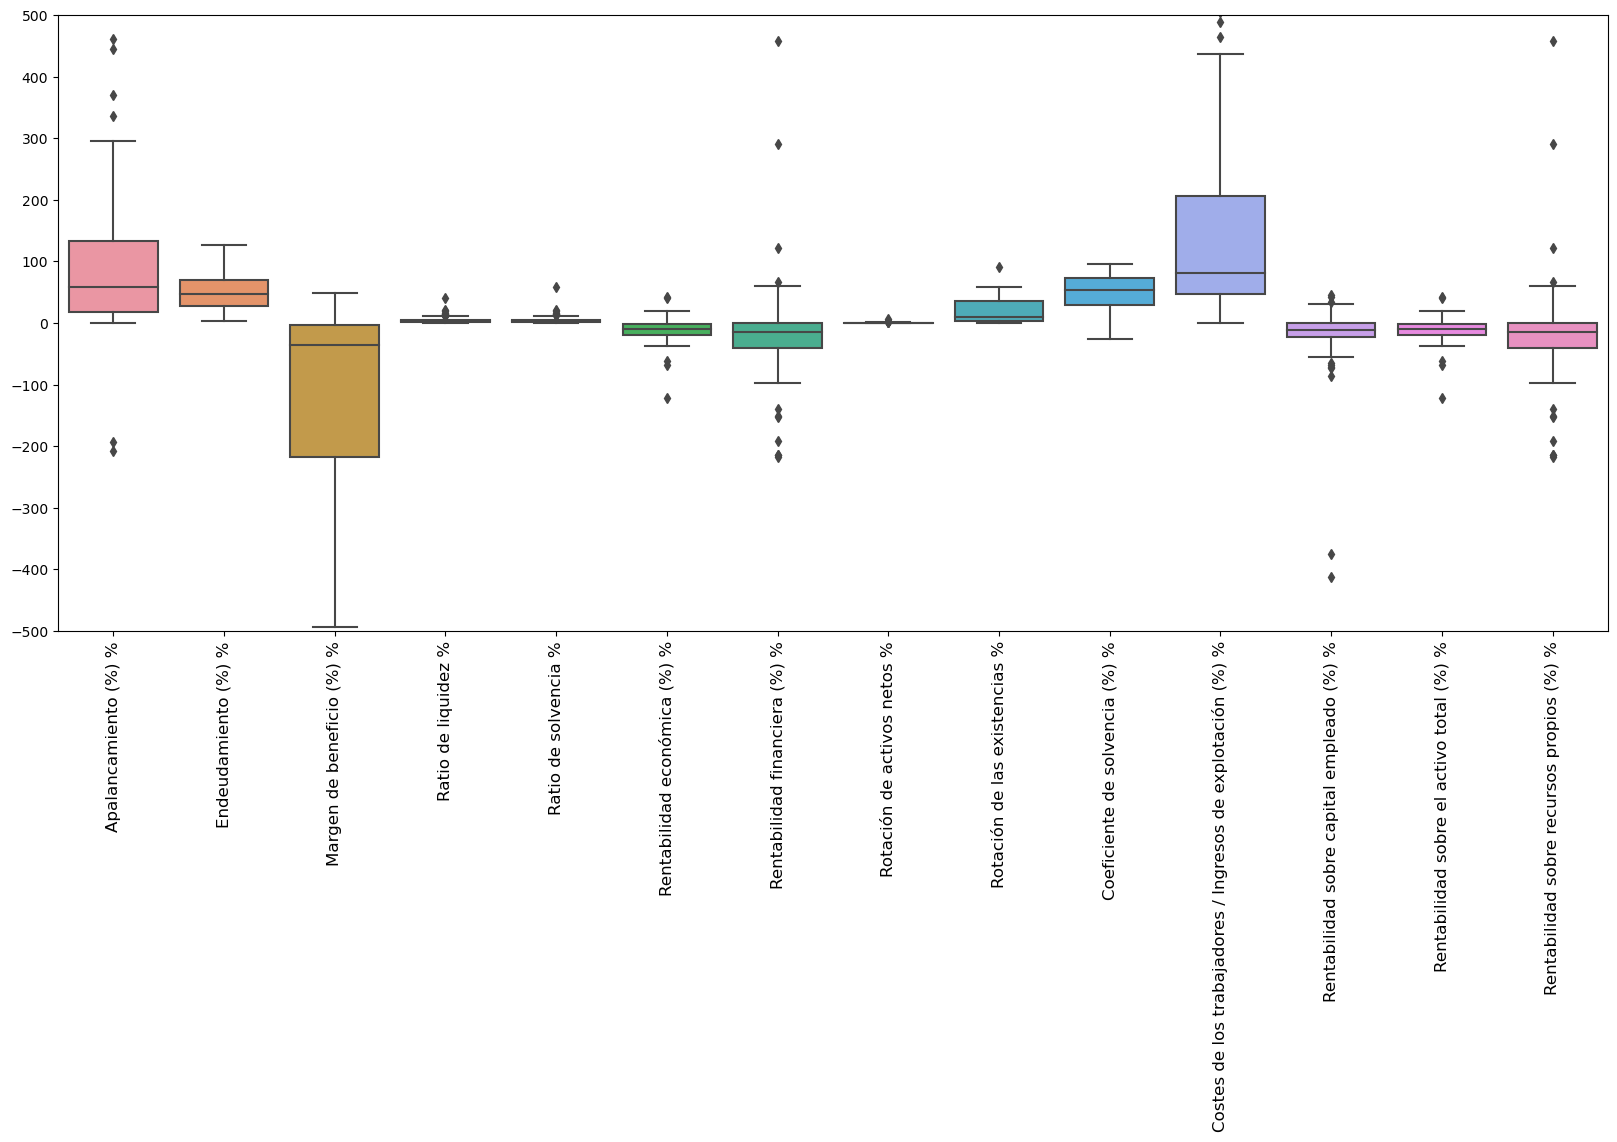

In [364]:
#Realizamos boxplot de las columnas numericas que estén mostradas en %.
df_porcentaje = df_valoracion.loc[:, df_valoracion.columns.str.contains('%')]
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df_porcentaje, ax=ax)
plt.xticks(rotation=90)
ax.set_ylim(-500, 500)
ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.show()

In [367]:
#Reemplazamos valores infinitos con 0.
df_valoracion['Precio/Venta']=df_valoracion['Precio/Venta'].replace([np.inf, -np.inf], 0)
df_valoracion['Ratio de liquidez %']=df_valoracion['Ratio de liquidez %'].replace([np.inf, -np.inf], 0)

C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\1623892013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Precio/Venta']=df_valoracion['Precio/Venta'].replace([np.inf, -np.inf], 0)
C:\Users\ikerm\AppData\Local\Temp\ipykernel_11876\1623892013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valoracion['Ratio de liquidez %']=df_valoracion['Ratio de liquidez %'].replace([np.inf, -np.inf], 0)


In [369]:
df_valoracion

,Codigo_NIF,Nombre_sabi,Fecha constitucion,Años en Mercado,Codigo primario CNAE 2009,Capital social mil EUR,Free capital mil EUR,Porcentaje_adquisicion_cat,year,Acreedores a L. P. mil EUR,...,Total pasivo,n_missings,ratio_last_funding,Precio/Venta,Precio/Ebitda,Precio/Ebit,Ratio_liquidez,Ratio_endeudamiento,Costes de los trabajadores,Margen_bruto(costes trabajadores)
8,B95810826,LOOKIERO STYLE SOCIEDAD LIMITADA.,2015-06-17,8,9609,18.21000,0.0,1,2021,5119.24600,...,18893.962000,1,0.531061,0.002904,-0.030180,-0.029140,9.252707,2.743795,2431.380228,0.009488
9,B95810826,LOOKIERO STYLE SOCIEDAD LIMITADA.,2015-06-17,8,9609,18.21000,0.0,1,2020,4700.78300,...,13272.016000,1,0.531061,0.003946,-0.052406,-0.048960,5.163298,1.924562,2495.329044,0.009287
12,B95610580,EDUCAEDU BUSINESS SOCIEDAD LIMITADA,2010-05-14,13,7311,34676.05600,0.0,2,2021,801.18120,...,6397.039280,2,0.066667,0.002311,0.015223,-0.511985,3.297763,4.881996,1576.859871,0.008909
13,B95610580,EDUCAEDU BUSINESS SOCIEDAD LIMITADA,2010-05-14,13,7311,34676.05600,0.0,2,2020,4184.44181,...,9079.682590,2,0.066667,0.002676,0.027307,-0.032555,0.922277,3.450250,1463.642496,0.008829
34,B75065052,VIVEBIOTECH SL.,2012-03-26,11,7211,3499.15502,0.0,1,2021,7965.85430,...,12582.556570,1,0.025974,0.000085,0.000377,0.001049,0.690871,1.852313,3198.209053,0.005357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,B95918082,MIKROBIOMIK HEALTHCARE COMPANY SOCIEDAD LIMITADA.,2018-04-19,5,7211,311.11100,0.0,1,2020,620.62846,...,744.430830,4,0.441176,0.000000,-0.003312,-0.002371,0.622672,1.628298,224.249937,-0.138662
790,B87217436,AURA INNOVATIVE ROBOTICS SL.,2015-02-16,8,2620,396.85335,0.0,1,2021,213.99035,...,577.614569,7,0.800000,0.000000,-0.033566,-0.029139,0.541900,2.993019,NaN,NaN
791,B87217436,AURA INNOVATIVE ROBOTICS SL.,2015-02-16,8,2620,396.85335,0.0,1,2020,116.96762,...,309.390830,4,0.800000,0.000000,0.134243,-2.919497,1.033646,4.881535,94.693973,-0.015438
794,B75172163,BIOTECH FOODS SL.,2017-02-07,6,7219,207.79200,0.0,1,2021,320.26150,...,955.234000,6,NaN,0.000000,-0.019370,-0.013563,2.135277,3.198967,NaN,NaN
